## Антон Буев. 5 вариант

## Решение нелинейных уравнений

In [1]:
import cmath
import numpy as np
import pandas as pd
from pylab import *
from math import cos, sqrt
from functools import partial
from tqdm import tqdm

%matplotlib inline

In [2]:
class SignError(Exception):
    pass

In [3]:
class Params(dict):
      def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)

### Задача 2.1
### 2.1.5
$$f(x) = (\cos~x)^2 - (\frac{1}{\sqrt{2}} + \frac{1}{4})\cos~x + \frac{1}{4\sqrt{2}} = 0 $$
$$g(x) = (\cos~x)^2 - \frac{2}{\sqrt{2}}\cos~x + \frac{1}{2} = 0$$
Найти все корни, содержащиеся на отрезке [a,b], с точностью $\varepsilon = 10^{-10}$

In [4]:
def f(x):
    return (cos(x)) ** 2 - (1 / sqrt(2) + 1 / 4) * cos(x) + 1 / (4 * sqrt(2))
def g(x):
    return cos(x) ** 2 - (2 / sqrt(2)) * cos(x) + 1 / 2

In [5]:
def bisection(epsilon, fun, left_border, right_border):
        middle = (left_border + right_border) / 2
        f_mid = fun(middle)
        f_left = fun(left_border)
        f_right = fun(right_border)
        
        if abs(f_left) < epsilon:
            return left_border
        if abs(f_right) < epsilon:
            return right_border
        
        if f_left * f_right > 0:
            raise SignError("Borders must be different signs")
        
        def left_case():
            return bisection(epsilon, fun, left_border, middle)
        
        def middle_case():
            return middle
        
        def right_case():
            return bisection(epsilon, fun, middle, right_border)
        
        if right_border - left_border < epsilon:
            return middle
        elif f_mid * f_left < 0:
            return left_case()
        elif abs(f_mid) < epsilon:
            return middle_case()
        else:
            return right_case()

In [6]:
def make_plot(function, boundaries):
    space = np.linspace(*boundaries, num=10000)
    f_values = np.array(list(map(function, space)))
    
    plot(space, f_values)
    
    axhline(y=0, color='k')
    axvline(x=0, color='k')
    
    grid(True, which='both')
    
    idx = np.argwhere(np.diff(np.sign(f_values - np.zeros(len(f_values))))).flatten()
    plt.plot(space[idx], f_values[idx], 'ro')

#### Нахождений корней f(x)=0.

In [7]:
boundaries = (0, 1.5)

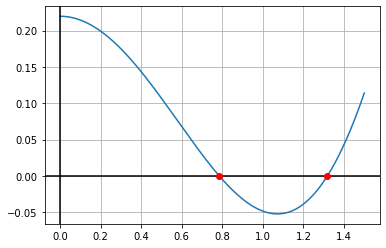

In [8]:
make_plot(f, boundaries)

In [9]:
print("Первый корень x =", bisection(10e-10, f, 0, 1))

Первый корень x = 0.7853981629014015


In [10]:
print("Второй корень x =", bisection(10e-10, f, 1, 1.5))

Второй корень x = 1.3181160725653172


#### Нахождение корней g(x)=0.

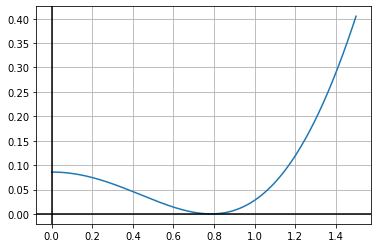

In [11]:
make_plot(g, boundaries)

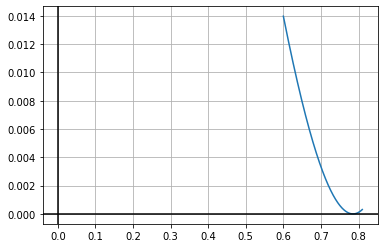

In [12]:
make_plot(g, (0.6, 0.81))

In [13]:
try:
  bisection(10e-10, g, 0.7, 0.786)
except Exception as e:
  print(e)

Borders must be different signs


In [14]:
from tabulate import tabulate

### Задача 2.6 
### 2.6.1
Локализовать корни уравнения $e^x - 3\sqrt{x} =0$ с точностью $\varepsilon = 10^{-5}$ и $\varepsilon = 10^{-12}$, используя метод Ньютона и упрощенный метод Ньютона


In [15]:
def f(x):
    return exp(x) - 3 * sqrt(x)
def df(x):
    return exp(x) - 3 / (2 * sqrt(x))

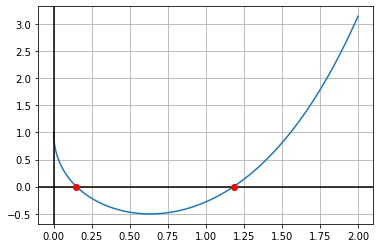

In [16]:
make_plot(f, (0,2))

In [17]:
def newton(epsilon, fun, fun_derivative, initial_guess):
        max_iter = int(10e5)
        guess = initial_guess
    
        for i in range(max_iter):
            f_guess = fun(guess)
            f_derivative_guess = fun_derivative(guess)
            
            new_guess = guess - f_guess / f_derivative_guess
            
            error = abs(guess - new_guess)
            
            if error < epsilon:
                return new_guess, Params(iter_num=i, epsilon=epsilon, guess=initial_guess)
            else:
                guess = new_guess
    

In [18]:
def print_root_with_params(root, params):
  print("Root: x = {} with params {}".format(root, params))

In [19]:
params = Params()  
for eps in (10e-5, 10e-12):
    for root in (0.1, 1): 
        new_root, params = newton(eps, f, df, root)
        print_root_with_params(new_root, params)

Root: x = 0.1499775897238302 with params {'iter_num': 3, 'epsilon': 0.0001, 'guess': 0.1}
Root: x = 1.1823747443517838 with params {'iter_num': 3, 'epsilon': 0.0001, 'guess': 1}
Root: x = 0.1499775897238347 with params {'iter_num': 4, 'epsilon': 1e-11, 'guess': 0.1}
Root: x = 1.1823747443240389 with params {'iter_num': 5, 'epsilon': 1e-11, 'guess': 1}


In [20]:
def newton_simplified(epsilon, fun, fun_derivative, initial_guess):
        max_iter = int(10e5)
        
        guess = initial_guess
        f_derivative_guess = fun_derivative(guess)
        
        for i in range(max_iter):
            f_guess = fun(guess)
            
            new_guess = guess - f_guess / f_derivative_guess
            
            error = abs(guess - new_guess)
            
            if error < epsilon:
                return new_guess, Params(iter_num=i, epsilon=epsilon, guess=initial_guess)
            else:
                guess = new_guess

In [21]:
params = Params()  
for eps in (10e-5, 10e-12):
    for root in (0.1, 1): 
        new_root, params = newton_simplified(eps, f, df, root)
        print_root_with_params(new_root, params)

Root: x = 0.14995031058889846 with params {'iter_num': 4, 'epsilon': 0.0001, 'guess': 0.1}
Root: x = 1.182355013560296 with params {'iter_num': 13, 'epsilon': 0.0001, 'guess': 1}
Root: x = 0.14997758972179892 with params {'iter_num': 16, 'epsilon': 1e-11, 'guess': 0.1}
Root: x = 1.1823747443212327 with params {'iter_num': 39, 'epsilon': 1e-11, 'guess': 1}


$$x_1 \approx 0.1500, x_2 \approx 1.1824$$

### Задача 2.9
### 2.9.2
Локализовать корни уравнения $3x^3 - 35x^2 +125x -125 = 0$ с точностью $\varepsilon = 10^{-7}$, используя метод Ньютона. Для поиска кратного корня и определения его кратности следует использовать модификацию метода Ньютона для случая кратного корня с $m = 1,2,3$

In [22]:
def f(x):
    return 3 * x ** 3 - 35 * x ** 2 + 125 * x - 125
def df(x):
    return 9 * x ** 2 - 70 * x + 125

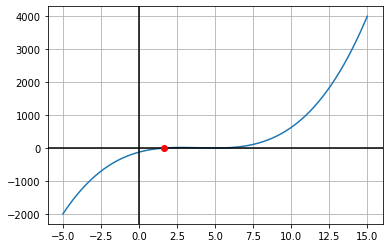

In [23]:
make_plot(f, (-5, 15))

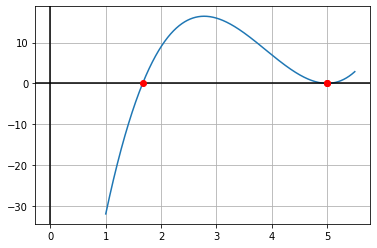

In [24]:
make_plot(f, (1, 5.5))

In [25]:
eps = 10e-7

Первый корень

In [26]:
new_root, params = newton_simplified(eps, f, df, 2)
print_root_with_params(new_root, params)

Root: x = 1.6666663779075301 with params {'iter_num': 24, 'epsilon': 1e-06, 'guess': 2}


Второй корень

In [27]:
new_root, params = newton_simplified(eps, f, df, 4)
print_root_with_params(new_root, params)

Root: x = 4.998952412863392 with params {'iter_num': 1043, 'epsilon': 1e-06, 'guess': 4}


Итого: $x_1 \approx 1.667, x_2 \approx 4.9989$

Метод Ньютона для случая кратного корня

In [28]:
def newton_multiple_roots(epsilon, m, fun, fun_derivative, initial_guess):
        def find_m_root(m, _guess):
            max_iter = int(10e5)
            for i in range(max_iter):
                f_guess = fun(_guess)
                f_derivative_guess = fun_derivative(_guess)
                
                new_guess = _guess - m * f_guess / f_derivative_guess
                
                error = abs(_guess - new_guess)
                
                if error < epsilon:
                    return new_guess, Params(iter_num=i, epsilon=epsilon, guess=initial_guess, m=m)
                else:
                    _guess = new_guess
                    
        return list(map(partial(find_m_root, _guess=initial_guess), range(1, m + 1)))
   

In [29]:
for guess in np.linspace(2, 4, 10):
        roots = newton_multiple_roots(1e-10, 3, f, df, guess)
        roots = list(map(lambda x: x if x is not None else None, roots))
#         print("For m = {} roots are {}:".format(3, roots))
        print(roots)
        

[(1.6666666666666667, {'iter_num': 5, 'epsilon': 1e-10, 'guess': 2.0, 'm': 1}), None, (4.99999997528018, {'iter_num': 29, 'epsilon': 1e-10, 'guess': 2.0, 'm': 3})]
[(1.6666666666666667, {'iter_num': 5, 'epsilon': 1e-10, 'guess': 2.2222222222222223, 'm': 1}), None, (5.000000043570666, {'iter_num': 35, 'epsilon': 1e-10, 'guess': 2.2222222222222223, 'm': 3})]
[(1.6666666666666667, {'iter_num': 6, 'epsilon': 1e-10, 'guess': 2.4444444444444446, 'm': 1}), None, (5.000000029254818, {'iter_num': 27, 'epsilon': 1e-10, 'guess': 2.4444444444444446, 'm': 3})]
[(1.6666666666666667, {'iter_num': 9, 'epsilon': 1e-10, 'guess': 2.6666666666666665, 'm': 1}), None, (5.000000063437742, {'iter_num': 27, 'epsilon': 1e-10, 'guess': 2.6666666666666665, 'm': 3})]
[(5.000000095310989, {'iter_num': 28, 'epsilon': 1e-10, 'guess': 2.888888888888889, 'm': 1}), (4.999999944568014, {'iter_num': 7, 'epsilon': 1e-10, 'guess': 2.888888888888889, 'm': 2}), (4.999999951277051, {'iter_num': 35, 'epsilon': 1e-10, 'guess': 2

#### Рассмотреть уравнение $f(x) + \delta = 0$, где $\delta = 10^{-8}$. Найти корень кратности 1

In [30]:
def deltaf(x):
    return f(x) + 10e-8

In [31]:
newton_multiple_roots(1e-5, 3, deltaf, df, 2)

[(1.6666666636666667, {'iter_num': 4, 'epsilon': 1e-05, 'guess': 2, 'm': 1}),
 None,
 None]

In [32]:
newton_multiple_roots(1e-5, 3, deltaf, f, 4.5)

[None, None, None]

In [33]:
newton_multiple_roots(1e-5, 3, deltaf, df, 5 + 0.5j)

[((4.99999972396839+0.00010020214063797883j),
  {'iter_num': 13, 'epsilon': 1e-05, 'guess': (5+0.5j), 'm': 1}),
 None,
 None]

In [34]:
newton_multiple_roots(1e-5, 3, deltaf, df, 5 - 0.5j)

[((4.99999972396839-0.00010020214063797883j),
  {'iter_num': 13, 'epsilon': 1e-05, 'guess': (5-0.5j), 'm': 1}),
 None,
 None]